# Tour of ML Classifiers: 
* Logistic Regression, 
* SVM, 
* Decision Tree, 
* KNN, 
* Random Forest.



***

## Logistic regression

The process of logistic regression is similar to the Adaline but instead of a linear activation it uses **the sigmoid function**.

$$\phi(z) = \frac{1}{1 + e^{-z}}$$

$$\phi(x, \theta) = \frac{1}{1 + e^{\theta^{T}x}}$$

The following shows and explains the **sigmoid function**.



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets

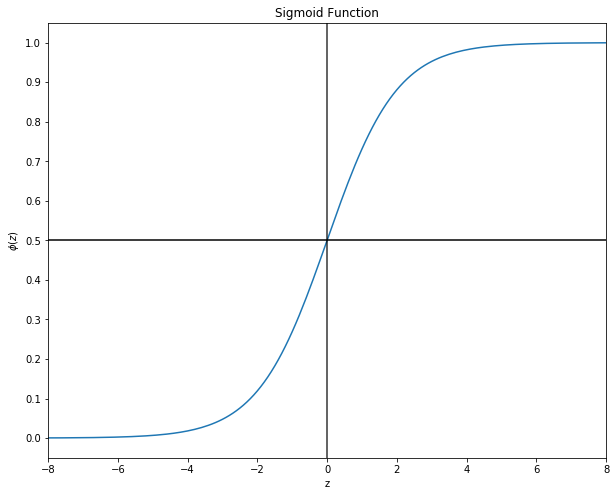

In [2]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))


z = np.arange(-10, 10, 0.1)
phi = sigmoid(z)

#sigmoid visualization
fig, ax =plt.subplots(figsize=(10,8))
ax.plot(z, phi)
ax.axvline(0, c='k', alpha=0.8)
ax.axhline(0.5, c='k')
ax.set_xlim(-8, 8)
ax.set_xlabel('z')
ax.set_ylabel('$\phi(z)$')
ax.set_title('Sigmoid Function')
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

The intersection at $\phi(z = 0) = 0.5$ allows to create a threshold for binary classification. Before deepen into th reason

Then the output is weighted by the function $\phi(z)$.

$$\dot{y} = 
    \left\{
            \begin{array}{ll}
            1 & \mbox{if } \phi(z) \geq 0.5 \\
            0 & \mbox{if } otherwise
            \end{array}
         \right.$$

#### Cost Function of Logistic Regression

In logistic regression, the update of the weights is performed by maximizing the maximum likelihood equation.

$$L(\theta) = \prod\limits_{i = 1}^{n}[\phi(z^{(i)})]^{y^{(i)}}[1 - \phi(z^{(i)})]^{1 - y^{(i)}}$$

By taking the log of this equation it becomes the log-likelihood equation.

$$l(\theta) = \sum\limits_{i = 1}^{n}[y\log(\phi(z^{(i)})) + (1 - y)\log(1 - \phi(z^{(i)}))]$$

Then, the cost function becomes:

$$J(\phi(z), y, \theta) = \sum\limits_{i = 1}^{n}[-y\log(\phi(z^{(i)})) - (1 - y)\log(1 - \phi(z^{(i)}))]$$

Just by seeing at the cost function equtaion, we know that:

$$J(\phi(z), y, \theta) = 
    \left\{
            \begin{array}{ll}
            -\log(\phi(z^{(i)})) & \mbox{if } y = 1 \\
            -\log(1 - \phi(z^{(i)})) & \mbox{if } y = 0
            \end{array}
         \right.$$

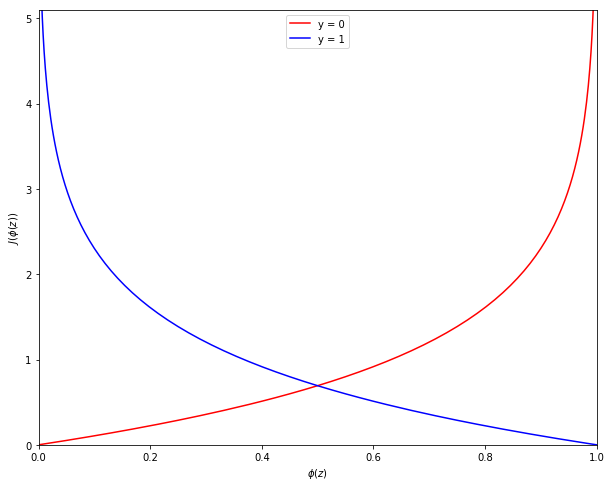

In [3]:
def cost1(z):
    return -np.log(sigmoid(z))

def cost0(z):
    return -np.log(1-sigmoid(z))

c1 = cost1(z)
c0 = cost0(z)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(phi, c0, label='y = 0', c='r')
ax.plot(phi, c1, label='y = 1', c='b')
ax.set_xlabel('$\phi(z)$')
ax.set_ylabel('$J(\phi(z))$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 5.1)
ax.legend(loc='upper center')

#### Converting an Adaline algorythm into a logistic regression

The upgrade of the weights is the product of the learning rate andd the partial derivative of the cost function. Below is the derivation for a single sample of data.

$$\nabla\theta = -\eta\frac{\partial}{\partial\theta}l(\theta)$$

$$\frac{\partial}{\partial\theta}l(\theta) = [y\frac{1}{\phi(z)} - (1 - y)\frac{1}{1 - \phi(z)}]\frac{\partial}{\partial\theta}\phi(z)$$

The derivative os the sigmoid function is also used,

$$\frac{\partial}{\partial z}\phi(z) = \frac{1}{(1 + e^{-z})^2}$$

$$\frac{\partial}{\partial z}\phi(z) = (\frac{1}{1 + e^{-z}})(1 - \frac{1}{1 + e^{-z}})$$

$$\frac{\partial}{\partial z}\phi(z) = \phi(z)(1 - \phi(z))$$

then, the cost function overall is converted into:

$$\frac{\partial}{\partial\theta}l(\theta) = [y\frac{1}{\phi(z)} - (1 - y)\frac{1}{1 - \phi(z)}]\phi(z)(1 - \phi(z))\frac{\partial}{\partial\theta}z$$

$$\frac{\partial}{\partial\theta}l(\theta) = [y(1 - \phi(z)) - (1 - y)\phi(z)]x$$
$$\frac{\partial}{\partial\theta}l(\theta) = \sum\limits_{i = 1}^{n}[y^{(i} - \phi(z^{(i)})]x^{(i)}$$

$$\nabla\theta = \eta\frac{\partial}{\partial\theta}l(\theta)$$

$$\nabla\theta = \eta\sum\limits_{i = 1}^{n}[y^{(i} - \phi(z^{(i)})]x^{(i)}$$

In [4]:
class LogRegGD(object):
    
    def __init__(self, eta=0.01, epoch=50, random_state=1):
        self.eta = eta
        self.epoch = epoch
        self.random_state = random_state
        
    def fit(self, X, y):
        
        ngen = np.random.RandomState(self.random_state)
        self.weights = ngen.normal(loc=0, scale=0.01, size=1+X.shape[1])
        self.cost = []
        
        for _ in range(self.epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = (y - output)
            self.weights[0] += self.eta*error.sum()
            self.weights[1:] += self.eta*X.T.dot(error)
            cost = (-y*np.log(output)) - (1 - y)*np.log(1 - output)
            self.cost.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, z):
        return 1/(1 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [5]:
np.random.seed(42)
x_mean1 = np.array([1, 1])
x_var1 = 0.5
x_mean2 = np.array([-2, -1])
x_var2 = 0.4

y = np.squeeze(np.hstack((np.ones(100), np.zeros(100))))
perm = np.random.permutation(len(y))

x1 = x_var1*np.random.randn(100, 2) + x_mean1
x2 = x_var2*np.random.randn(100, 2) + x_mean2

x = np.vstack((x1, x2))[perm, ]
y = np.squeeze(np.hstack((np.ones(100), np.zeros(100))))[perm]

In [6]:
lrg_snd = LogRegGD()
lrg_snd.fit(x, y)
y_pd = lrg_snd.predict(x)
accuracy_score(y, y_pd)

1.0

In [7]:
def plot_desicion_region(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min(), X[:,0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, cmap=cmap, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, 
                    edgecolor='black')
    

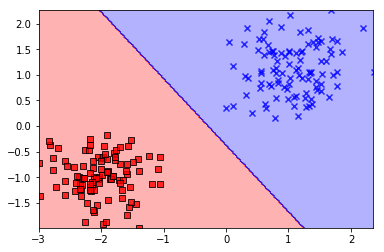

In [8]:
plot_desicion_region(x, y, lrg_snd)

In [9]:
# ogistic Regression with Stochastic Gradient Descent

class LogRegSGD(object):
    
    def __init__(self, eta=0.01, epoch=50, random_state=1, shuffle=True):
        self.eta = eta
        self.epoch = epoch
        self.random_state = random_state
        self.shuffle = shuffle
        
    def fit(self, X, y):
        
        self.ngen = np.random.RandomState(self.random_state)
        self.weights = self.ngen.normal(loc=0, scale=0.01, size=1+X.shape[1])
        self.cost = []
        
        for _ in range(self.epoch):
            
            if self.shuffle:
                X, y = self.shuffles(X, y)
                
            costs = []
            
            for xi, target in zip(X, y):
                net_input = self.net_input(xi)
                output = self.activation(net_input)
                error = (target - output)
                self.weights[0] += self.eta*error
                self.weights[1:] += self.eta*xi.T.dot(error)
                cost = (-y*np.log(output) - (1-y)*np.log(1-output))
                costs.append(cost)
            avg_cost = sum(costs)/len(y)
            self.cost.append(avg_cost)
        return self
    
    def shuffles(self, X, y):
        perm = self.ngen.permutation(len(y))
        return X[perm, ], y[perm]
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, z):
        return (np.exp(-np.clip(z, -250, 250))+1)**-1
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [10]:
lrgs_snd = LogRegSGD()
lrgs_snd.fit(x, y)
y_pds = lrgs_snd.predict(x)
accuracy_score(y, y_pds)

1.0

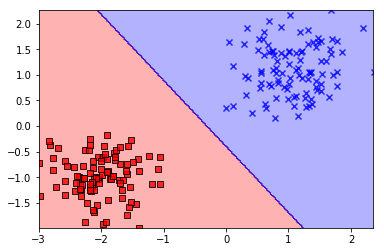

In [11]:
plot_desicion_region(x, y, lrgs_snd)

In [12]:
iris = datasets.load_iris()

In [13]:
data = iris.data[:, [0,2]]
target = iris['target']

In [14]:
lrgs_sndd = LogRegSGD()
lrgs_sndd.fit(data, target)
y_pdrs = lrgs_sndd.predict(data)
accuracy_score(target, y_pdrs)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


0.3333333333333333

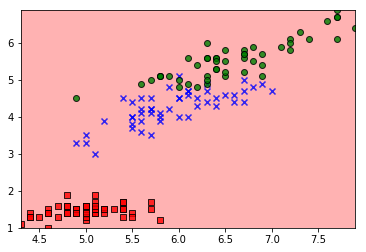

In [15]:
plot_desicion_region(data, target, lrgs_sndd)

In [16]:
lrg = LinearRegression()

lrg.fit(data, target)
lrg_p = lrg.predict(data)


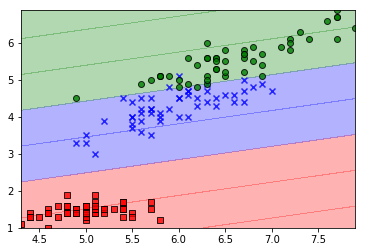

In [17]:
plot_desicion_region(data, target, lrg)

# SVM

Support Vector Machine uses the **Hinge loss function** to create two boundaey layers for each class whose margin determine the sensitivity to error prediction.

$$l(y, \theta, x) = 
    \left\{
            \begin{array}{ll}
            0 & \mbox{if } \theta^Tx \geq 1 \\
            1 - \theta^Tx & \mbox{} otherwise
            \end{array}
         \right.$$
         
Let us remember the weights are updated by the gradient descent of the cost function. 
         
         
$$\theta = \theta + \nabla\theta$$


$$\nabla\theta = \eta(y_i\theta^Tx_i - 2\lambda\theta)$$



In [158]:
class SVM_SGD(object):
    
    def __init__(self, eta=0.01, epoch=50, shuffle=True, random_state=1):
        self.eta = eta
        self.epoch = epoch
        self.shuffle= shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        
        self.ngen = np.random.RandomState(self.random_state)
        self.weights = self.ngen.normal(loc=0, scale=0.01, size=1+X.shape[1])
        
        x = self.intercept(X)
        
        for _ in range(self.epoch):
            
            if self.shuffle:
                x, y = self.shuffles(x, y)
            
            for xi, target in zip(x, y):
                net_input = self.net_input(xi)
                output = target*self.activation(net_input)
                
                if output < 1:
                    self.weights += self.eta*(xi.T.dot(target) - (2/self.epoch)*self.weights)
                    
                else:
                    self.weights += self.eta*((-2/self.epoch)*self.weights)
                    
                    
        return self
    
    def shuffles(self, X, y):
        shl = self.ngen.permutation(len(y))
        return X[shl, :], y[shl]
    
    def intercept(self, X):
        x = np.hstack((X, np.ones((len(X), 1))))
        return x
    
    def activation(self, X):
        return X
    
    def net_input(self, X):
        return np.dot(X, self.weights)
    
    def predict(self, X):
        x = self.intercept(X)
        return np.where(self.activation(self.net_input(x)) >=1, 1, -1)
    
    def score(self, X, y):
        counter = 0
        pred = self.predict(x)
        
        for p, target in zip(pred, y):
            counter += int(p == target)
        return counter/len(y)

In [159]:
svm = SVM_SGD()

In [160]:
svm.fit(x, y)

In [161]:
y_pr = svm.predict(x)

In [162]:
svm.score(x, y)

0.97

In [164]:
cot = 0
for ie, pred in zip(y_pr, y):
    cot += int(ie == pred)
cot/len(y)

0.97

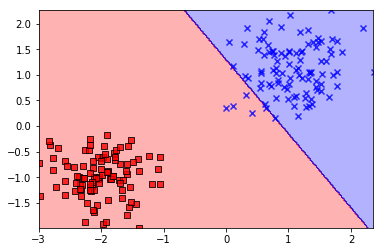

In [165]:
plot_desicion_region(x, y, svm)

In [166]:
svm2 = SVM_SGD(epoch=1000)

In [167]:
svm2.fit(x, y)

In [168]:
svm2.score(x, y)

1.0

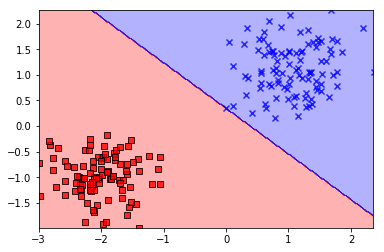

In [169]:
plot_desicion_region(x, y, svm2)

# Decision Tress 

Compared to other classifiers, decision trees does not perform gradient descent to determine the wegihts for each feature. Instead, the split at each is due to question that provides the largest information gain. Information gain goes row wise through to each column to gain information to separate strategically and predict each class.

$$IG(D_p, f) = I(D_p) - \sum\limits_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$$

Information gain is obtained by the difference of the impurity at the node parent node and to the sum of the impurities for each children multiplied by the total samples at each leave divided the the total samples from the parent node. There are three types of impurities measure, **entropy**, **gini**, **classification error**.

$$I_H = -\sum\limits_{j=1}^{c}p\log_2(p)$$

$$I_G = 1 - \sum\limits_{i=1}^{c}p^2$$

$$I_E = 1 - \max{[p, 1-p]}$$


In [231]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def gini(p):
    return p*(1 - p) + (1-p)*(1-(1-p))

def error(p):
    return 1 - np.max([p, (1-p)])

In [232]:
x = np.arange(0.00, 1.0, 0.01)

ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(p) for p in x]
gin = [gini(p) for p in x]

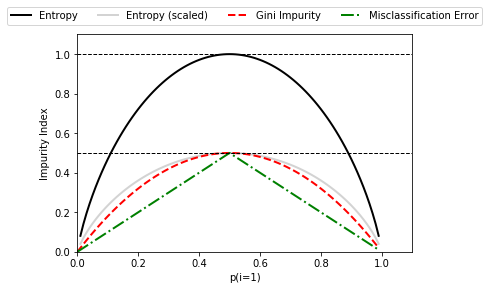

In [233]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gin, err], 
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'], 
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [189]:
training_data = [
    ['green', 3, 'apple'],
    ['yellow', 3, 'apple'], 
    ['red', 1, 'grape'], 
    ['red', 1, 'grape'],
    ['yellow', 3, 'lemon'],
]

header = ['color', 'diameter', 'label']

In [190]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset"""
    return set([row[col] for row in rows])

In [191]:
unique_vals(training_data, 0)

{'green', 'red', 'yellow'}

In [192]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset"""
    counts = {}
    
    for row in rows:
        
        label = row[-1]
        
        if label not in counts:
            
            counts[label] = 0
            
        counts[label] += 1
        
    return counts
        

In [193]:
class_counts(training_data)

{'apple': 2, 'grape': 2, 'lemon': 1}

In [196]:
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

In [203]:
class Question:
    
    def __init__(self, column, value):
        self.column = column
        self.value = value
        
    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
        
    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" %(header[self.column], condition, str(self.value))

In [204]:
Question(1, 3)

Is diameter >= 3?

In [205]:
Question(1, 'green')

Is diameter == green?

In [206]:
def partition(rows, question):
    
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [208]:
true_rows, false_rows = partition(training_data, Question(0, 'red'))

true_rows, false_rows

([['red', 1, 'grape'], ['red', 1, 'grape']],
 [['green', 3, 'apple'], ['yellow', 3, 'apple'], ['yellow', 3, 'lemon']])

In [209]:
def gini(rows):
    
    counts = class_counts(rows)
    impurity = 1
    for lb in counts:
        prob_lb = counts[lb]/float(len(rows))
        impurity -= prob_lb**2
    return impurity

In [214]:
no_mixing = [['apple'],['apple']]
some_mixing = [['apple'],['orange']]
lots_mixing = [
    ['apple'],
    ['orange'],
    ['grape'],
    ['grapefruit'],
    ['blueberry']
              ]

In [215]:
gini(no_mixing)

0.0

In [216]:
gini(some_mixing)

0.5

In [217]:
gini(lots_mixing)

0.7999999999999998

In [218]:
def find_best_split(rows):
    
    best_gain = 0
    best_question = None
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1
    
    for col in range(n_features):
        
        values = set([row[col] for row in rows])
        
        for val in values:
            question = Quesgtion(col, val)
            
            true_rows, false_rows = partition(rows, question)
            
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
            
            gain = info_gain(true_rows, false_rows, current_uncertainty)
            
            if gain >= best_gain:
                best_gain, best_question = gain, question
    return best_gain, best_question

In [219]:
def info_gain(left, right, current_uncertainty):
    
    p = float(len(left))/ (len(left) + len(right))
    return current_uncertainty - p*gini(left) - (1-p)*gini(right)

In [221]:
current_uncertainty = gini(training_data)
current_uncertainty

0.6399999999999999

In [222]:
def build_tree(rows):
    
    gain, question = find_best_split(rows)
    
    if gain == 0:
        return Leaf(rows)
    
    true_rows, false_rows = partition(rows, question)
    
    true_branch = build_tree(true_rows)
    
    false_branch = build_tree(false_rows)
    
    return Decision_Node(question, true_branch, false_branch)

In [235]:
def print_tree(node, spacing=""):
    
    if isinstance(node, Leaf):
        print((spacing + "Predict", node.predictions))
        return
    
    print((spacing + str(node.question)))
    
    print((spacing + '--> True:')
    print_tree(node.true_branch, spacing = " ")
    
    print((spacing + '--> False:'))
    print_tree(node.false_branch, spacing = " ")

SyntaxError: invalid syntax (<ipython-input-235-e9bb3afd2547>, line 10)

In [225]:
class Decision_Node:
    
    def __init__(self, question, true_branch, false_branch):
        
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [226]:
def classify(row, node):
    
    if isinstance(node, Leaf):
        return node.predictions
    
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)